In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bowling_stats = pd.read_csv(r"C:\Users\Rohan\OneDrive\Desktop\Rohan\T20 Int Matches\Bowling_Stats.csv")
bowling_stats.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,TG Southee (NZ),2008-2024,123,120,2681,446.5,6,3635,157,43221,23.15,8.13,17.07,2,2
1,Shakib Al Hasan (BAN),2006-2023,117,115,2535,422.3,3,2869,140,43952,20.49,6.79,18.10,5,2
2,Rashid Khan (AFG/ICC),2015-2024,85,85,1946,324.2,1,1970,138,45356,14.27,6.07,14.10,5,2
3,IS Sodhi (NZ),2014-2024,111,107,2279,379.5,-,3048,132,46844,23.09,8.02,17.26,3,-
4,MJ Santner (NZ),2015-2024,100,98,2072,345.2,2,2457,111,45600,22.13,7.11,18.66,3,-


In [3]:
print("\nSummary Statistics of Bowling Stats Data:")
print(bowling_stats.describe())


Summary Statistics of Bowling Stats Data:
              Mat        Inns        Balls       Overs         Runs  \
count  100.000000  100.000000   100.000000  100.000000   100.000000   
mean    65.370000   61.810000  1281.050000  213.341000  1522.000000   
std     21.253475   18.241198   399.030273   66.487342   545.457013   
min     34.000000   33.000000   740.000000  123.200000   622.000000   
25%     52.750000   50.750000  1015.000000  169.100000  1183.000000   
50%     58.500000   57.000000  1173.500000  195.350000  1413.000000   
75%     77.000000   70.000000  1430.750000  238.275000  1732.250000   
max    130.000000  120.000000  2681.000000  446.500000  3635.000000   

             Wkts           BBI        Ave        Econ          SR  
count  100.000000    100.000000  100.00000  100.000000  100.000000  
mean    74.550000  42287.120000   20.36400    7.071600   17.191400  
std     20.803251   8111.491021    4.21804    0.925316    2.463923  
min     54.000000  11079.000000    8.8800

In [5]:
print("\nMissing Values in Bowling Stats Data:")
print(bowling_stats.isnull().sum())


Missing Values in Bowling Stats Data:
Player    0
Span      0
Mat       0
Inns      0
Balls     0
Overs     0
Mdns      0
Runs      0
Wkts      0
BBI       0
Ave       0
Econ      0
SR        0
4         0
5         0
dtype: int64


**TOP 5 BOWLERS WITH BEST ECONOMY IN T20I MATCHES WITH MORE THAN 85 GAMES PLAYED**

In [13]:
filtered_stats = bowling_stats[bowling_stats['Mat'] > 85]
sorted_stats = filtered_stats.sort_values(by='Econ', ascending=True)
top_5_bowlers = sorted_stats.head(5)
top_5_bowlers[['Player', 'Econ']]

,Player,Econ
69,Mohammad Hafeez (PAK),6.60
14,Shahid Afridi (ICC/PAK),6.63
1,Shakib Al Hasan (BAN),6.79
21,B Kumar (IND),6.96
10,Shadab Khan (PAK),7.07


**SCATTER PLOT B/W WICKETS AND RUNS CONCEDED**

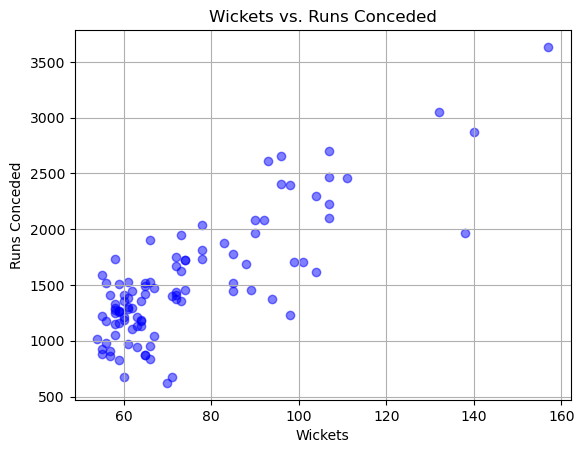

In [19]:
plt.scatter(bowling_stats['Wkts'], bowling_stats['Runs'], color='blue', alpha=0.5)
plt.title('Wickets vs. Runs Conceded')
plt.xlabel('Wickets')
plt.ylabel('Runs Conceded')
plt.grid(True)
plt.show()

**SCATTER PLOT B/W BOWLING AVERAGE AND ECONOMY RATE**

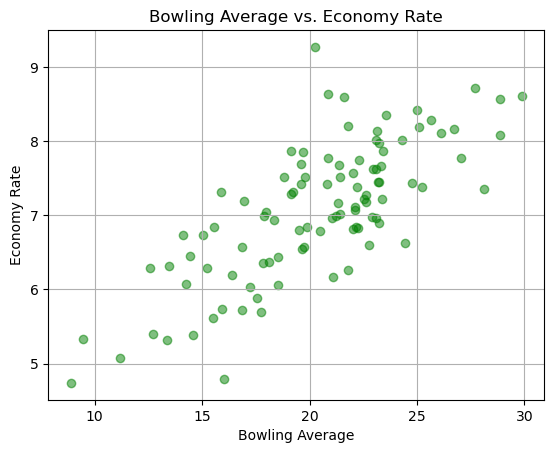

In [20]:
plt.scatter(bowling_stats['Ave'], bowling_stats['Econ'], color='green', alpha=0.5)
plt.title('Bowling Average vs. Economy Rate')
plt.xlabel('Bowling Average')
plt.ylabel('Economy Rate')
plt.grid(True)
plt.show()

**TOP 5 BOWLERS OF EACH COUNTRY WITH HIGHEST WICKETS**

In [24]:
# Extract country from the 'Player' column
bowling_stats['Country'] = bowling_stats['Player'].str.extract(r'\((.*?)\)')

# Grouping the data by country and sorting the runs within each group
top_bowlers_by_country = bowling_stats.groupby('Country').apply(lambda x: x.nlargest(5, 'Wkts')).reset_index(drop=True)
top_bowlers_by_country[['Player', 'Wkts', 'Country']]

,Player,Wkts,Country
0,Mohammad Nabi (AFG),93,AFG
1,Mujeeb Ur Rahman (AFG),58,AFG
2,Rashid Khan (AFG/ICC),138,AFG/ICC
3,A Zampa (AUS),92,AUS
4,MA Starc (AUS),74,AUS
...,...,...,...
87,S Badree (WI/World),56,WI/World
88,TL Chatara (ZIM),62,ZIM
89,R Ngarava (ZIM),59,ZIM
90,LM Jongwe (ZIM),58,ZIM


**TOP 5 INDIAN BOWLERS WITH MOST NUMBER OF WICKETS IN T20I MATCHES**

In [27]:
# Filtering the DataFrame for rows where the country is "IND" (India)
indian_bowler = bowling_stats[bowling_stats['Country'] == 'IND']

# Sorting the wickets in descending order to find the top 5 bowlers for India
top_5_indian_bowlers = indian_bowler.nlargest(5, 'Runs')
top_5_indian_bowlers[['Player','Mat','Wkts', 'Country']]

,Player,Mat,Wkts,Country
15,YS Chahal (IND),80,96,IND
21,B Kumar (IND),87,90,IND
36,HH Pandya (IND),92,73,IND
40,R Ashwin (IND),65,72,IND
31,JJ Bumrah (IND),62,74,IND


**TOP 5 COUNTRIES WITH MOST NUMBER OF WICKETS IN T20I**

In [34]:
wickets_by_country = bowling_stats.groupby('Country')['Wkts'].sum().reset_index()
sorted_wickets = wickets_by_country.sort_values(by='Wkts', ascending=False)

top_5_countries = sorted_wickets.head(5)
for index, row in top_5_countries.iterrows():
    country = row['Country']
    total_wickets = row['Wkts']
top_5_countries[['Country','Wkts']]

,Country,Wkts
24,PAK,682
22,NZ,647
11,IND,526
30,SL,398
12,IRE,391


**DISPLAYING CAREER SPAN OF THE BOWLER**

In [42]:
def display_bowling_career_stats(player_name):
    # Check if the player exists in the dataset
    if player_name in bowling_stats['Player'].values:
        # Retrieve player's data
        player_data = bowling_stats[bowling_stats['Player'] == player_name].iloc[0]

        # Print career statistics
        print(f"Player: {player_data['Player']}")
        print(f"Career Span: {player_data['Span']}")
        print(f"Matches Played: {player_data['Mat']}")
        print(f"Total Wickets: {player_data['Wkts']}")
        print(f"Bowling Average: {player_data['Ave']}")
        print(f"Economy: {player_data['Econ']}")
        print(f"Maidens Bowled: {player_data['Mdns']}")
    else:
        print("Player not found in the dataset")

# Take input from the user for player's name
player_name = input("Enter the player's name: ")

# Display career statistics for the selected player
display_bowling_career_stats(player_name)

Enter the player's name: YS Chahal (IND)
Player: YS Chahal (IND)
Career Span: 2016-2023
Matches Played: 80
Total Wickets: 96
Bowling Average: 25.09
Economy: 8.19
Maidens Bowled: 2
